In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import contractions
from nltk.corpus import stopwords
from collections import Counter
import nltk

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# load review dataset
review = pd.read_csv('ALL_REVIEWS.csv', sep='|')

In [4]:
# get data summary
def get_summary(df):
    # get df dimension
    rows, col = df.shape
    print(f"Total Rows:{rows}, Total columns:{col}\n")

    # Get first 5 rows
    print("Data Head\n")
    print(df.head(), "\n")

    # get last 5 rows
    print("Data Tail\n")
    print(df.tail(), "\n")

    # get dataframe Info
    print("Data Info\n")
    print(df.info())

In [5]:
get_summary(review)

Total Rows:449172, Total columns:7

Data Head

   Unnamed: 0 product_category star_rating  helpful_votes  total_votes  \
0           0          Apparel           1            0.0          0.0   
1           1          Apparel           1            3.0          5.0   
2           2          Apparel           1            1.0          1.0   
3           3          Apparel           1            0.0          0.0   
4           4          Apparel           1            0.0          0.0   

       review_headline                                        review_body  
0             One Star                                not exact in sizing  
1  Expensive Cinch Sak  I did not buy this jacket from Amazon. But it ...  
2         DISAPPOINTED  This product is a piece of s***. It doesn't lo...  
3          WRONG PLACE                         ITS THE PUERTO RICAN FLAG.  
4             One Star  it's not a dress but a top. cheap fabric, not ...   

Data Tail

        Unnamed: 0 product_category sta

In [6]:
col_to_drop = ['Unnamed: 0']
review = review.drop(columns=col_to_drop)

In [7]:
# check for null and duplicate value
def null_and_duplicates(df):
    # get null value for each column
    null_counts = df.isnull().sum()
    # Total number of null values in the DataFrame
    total_nulls = null_counts.sum()
    # Count the number of duplicate rows
    duplicate_rows = df.duplicated().sum()
    
        # store in a dictionary
    result = {
        "null_counts_per_column": null_counts,
        "total_nulls": total_nulls,
        "duplicate_rows": duplicate_rows
    }
    print(result)

In [8]:
null_and_duplicates(review)

{'null_counts_per_column': product_category      0
star_rating           0
helpful_votes       112
total_votes         112
review_headline     125
review_body         205
dtype: int64, 'total_nulls': 554, 'duplicate_rows': 12753}


In [9]:
# drop null rows
review.dropna(inplace=True)

In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
# create a function to clean the text column
def clean_text(text):
    text = contractions.fix(text)
    text = re.sub(r'<\s*br\s*/?\s*>', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'[^A-Za-z]', ' ', text)
    token = text.split()
    token = [a for a in token if a.lower() not in stop_words]
    token = [a for a in token if len(a) > 1]
    text_cleaned = ' '.join(token)
    text_cleaned = text_cleaned.lower()
    return text_cleaned

In [12]:
# create new cleaned column
review['review_body_cleaned'] = review['review_body'].apply(clean_text)
review['review_headline_cleaned'] = review['review_headline'].apply(clean_text)

In [13]:
# create sentiment column based on rating
col = review['star_rating']
conditions = [
    col.isin(['1', '2']),
    col == '3',
    col.isin(['4', '5'])
]
choices = ['negative', 'neutral', 'positive']
review['sentiment'] = np.select(conditions, choices, default='Unknown')

In [14]:
# get unique value of product category
print(review['product_category'].unique())

['Apparel' 'Automotive' 'Baby' 'Beauty' 'Books' 'Camera'
 'Digital_Ebook_Purchase' 'Digital_Music_Purchase' 'Digital_Software'
 'Digital_Video_Download' 'Digital_Video_Games' 'Electronics' 'Furniture'
 'Gift Card' 'Grocery' 'Health & Personal Care' 'Major Appliances'
 'Mobile_Apps' 'Mobile_Electronics' 'Musical Instruments' 'Music'
 'Office Products' 'Outdoors' 'PC' 'Personal_Care_Appliances'
 'Pet Products' 'Shoes' 'Software' 'Sports' 'Tools' 'Toys' 'Video DVD'
 'Video Games' 'Video' 'Watches' 'Wireless']


In [15]:
# function to count words
def word_count(text):
    word_counts = Counter(text.split())
    return sum(word_counts.values())

# col to count
col_to_count = ['review_headline', 'review_headline_cleaned', 'review_body', 'review_body_cleaned']

In [16]:
for col in col_to_count:
    review[f'{col}_count'] = review[col].apply(word_count)

# create a dict to store grouped data by product category
dict_data = {}

col_to_group = ['review_headline_count', 'review_headline_cleaned_count', 'review_body_count', 'review_body_cleaned_count']

for col in col_to_group:
    dict_data[col] = review.groupby('product_category')[col].mean()

# display grouped word counts
for key, value in dict_data.items():
    print(f"\nAverage {key} by product_category:\n")
    print(value)


Average review_headline_count by product_category:

product_category
Apparel                     5.005603
Automotive                  4.996239
Baby                        5.419347
Beauty                      4.887964
Books                       4.903985
Camera                      5.503281
Digital_Ebook_Purchase      3.828544
Digital_Music_Purchase      4.475150
Digital_Software            5.793374
Digital_Video_Download      5.088828
Digital_Video_Games         4.820371
Electronics                 5.241379
Furniture                   5.683149
Gift Card                   4.213754
Grocery                     6.557369
Health & Personal Care      5.604448
Major Appliances            5.682724
Mobile_Apps                 3.279504
Mobile_Electronics          4.976640
Music                       5.001440
Musical Instruments         5.237318
Office Products             5.013844
Outdoors                    5.515763
PC                          5.232499
Personal_Care_Appliances    4.896560
Pet P

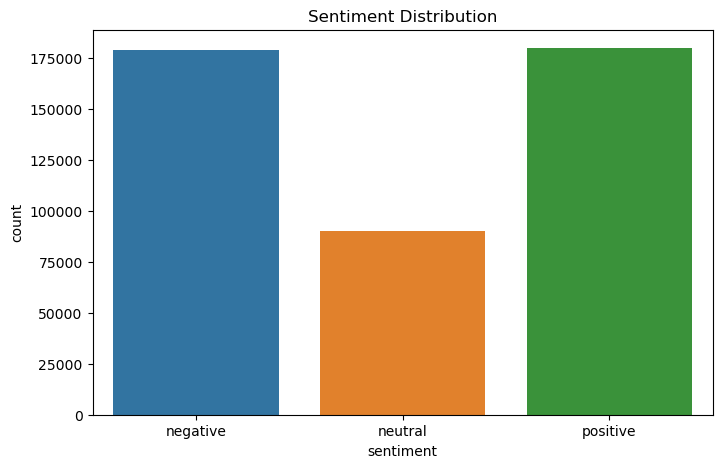

In [17]:
# plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=review)
plt.title("Sentiment Distribution")
plt.show()

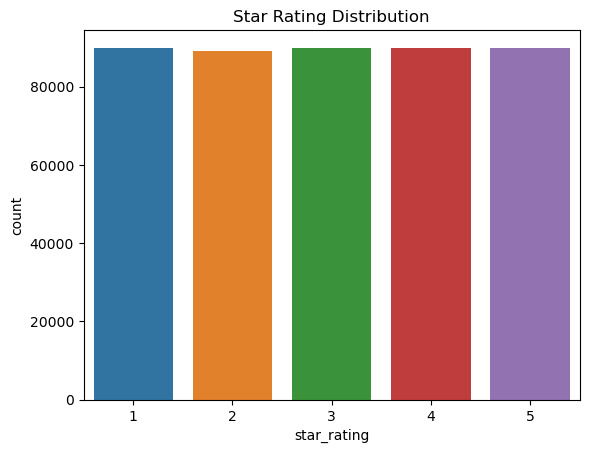

In [18]:
sns.countplot(x='star_rating', data=review)
plt.title('Star Rating Distribution')
plt.show()

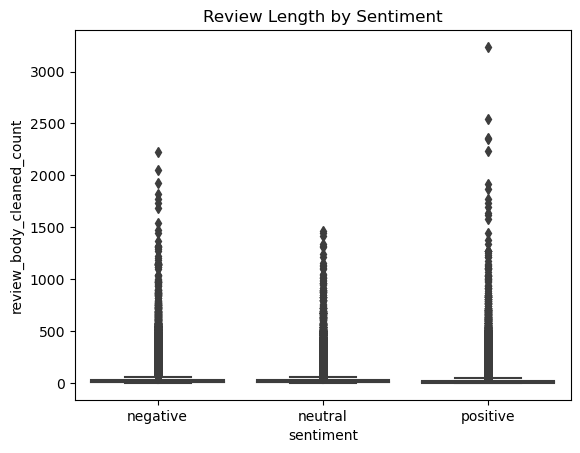

In [19]:
sns.boxplot(x='sentiment', y='review_body_cleaned_count', data=review)
plt.title('Review Length by Sentiment')
plt.show()

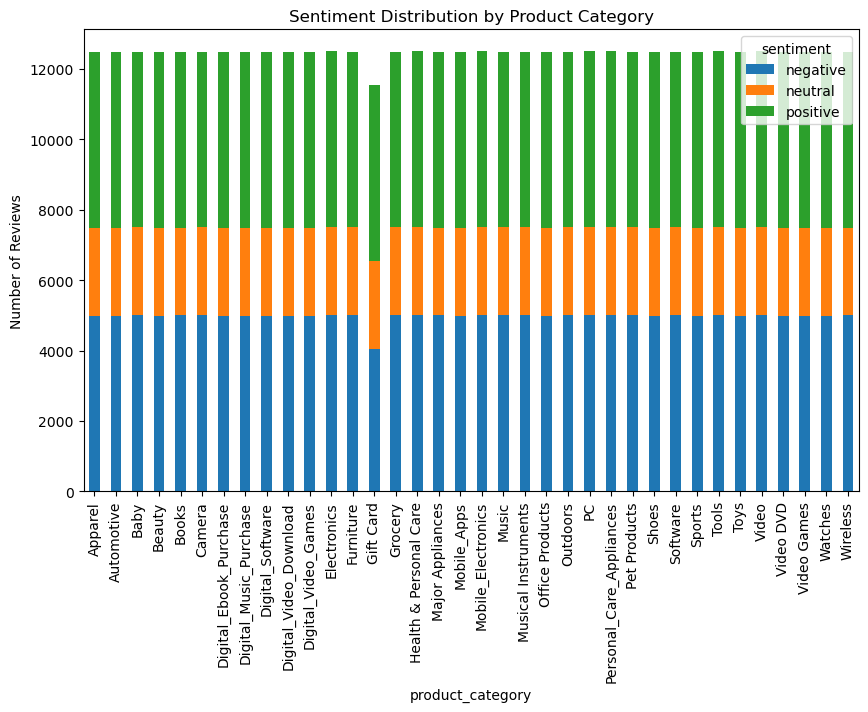

In [20]:
sentiment_by_product = review.groupby(['product_category', 'sentiment']).size().unstack().fillna(0)
sentiment_by_product.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Product Category')
plt.ylabel('Number of Reviews')
plt.show()

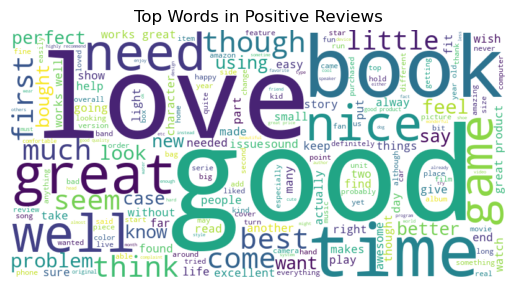

In [37]:
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = set(STOPWORDS).union({
    'one', 'even', 'use', 'used', 'thing', 'got', 'set', 'way', 'lot',
    'still', 'also', 'really', 'make', 'buy', 'get', 'back', 'go', 'see', 'work'
})

text_pos = ' '.join(review[review['sentiment']=='positive']['review_body_cleaned'])
wc = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_pos)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Positive Reviews")
plt.show()

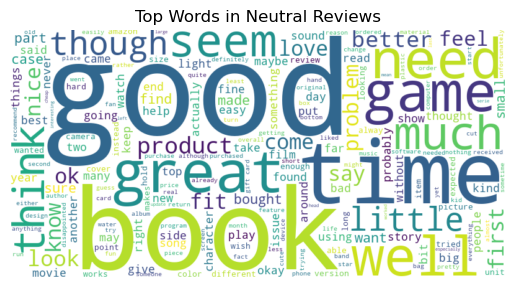

In [38]:
text_pos = ' '.join(review[review['sentiment']=='neutral']['review_body_cleaned'])
wc = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_pos)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Neutral Reviews")
plt.show()

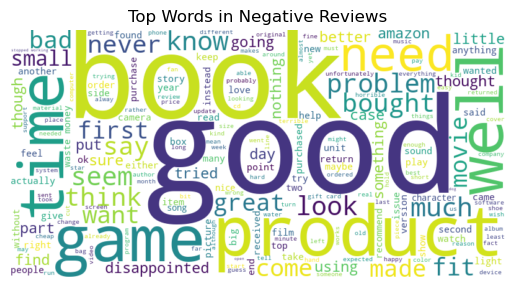

In [39]:
text_pos = ' '.join(review[review['sentiment']=='negative']['review_body_cleaned'])
wc = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text_pos)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Negative Reviews")
plt.show()

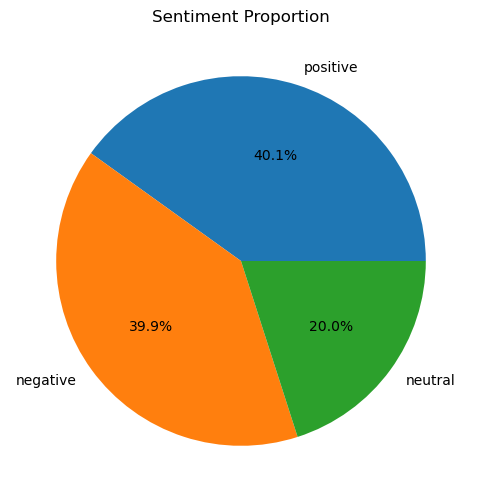

In [22]:
review['sentiment'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sentiment Proportion')
plt.ylabel('')
plt.show()